In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph

In [65]:
def calc_metrics(clf, y):
    h = metrics.homogeneity_score(y.ravel(), clf.labels_)
    c = metrics.completeness_score(y.ravel(), clf.labels_)
    v = metrics.v_measure_score(y.ravel(), clf.labels_)
    return h, c, v

In [73]:
def clusterize(x, y, linkage, n_clusters=2, connectivity=None, compute_full_tree=False, dist_threshold=None):
    clustering = AgglomerativeClustering(
        n_clusters=n_clusters, linkage=linkage, connectivity=connectivity,
        compute_full_tree=compute_full_tree, distance_threshold=dist_threshold
    )
    clustering.fit(x)
    h, c, v = calc_metrics(clustering, y)
    fig = plt.figure()
    plt.title("%(linkage)s\nHomogeneity %(h).2f|Completeness %(c).2f|V_measure %(v).2f" % {
        'linkage': linkage, 'h': h, 'c': c, 'v': v
    }, size=10)

    plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)
    plt.tight_layout()

    plt.show()

<h1>Hierarchical Clustering</h1>

<b>Professor: </b> Hélio Côrtes Vieira Lopes <br>
<b>Disciplina: </b> Macinhe Learning <br>
<b>Alunos: </b> Abner Cardoso da Silva, Anderson, Anderson, Bruno Yusuke Kitabayashi, Guilherme, Hugo <br>



## Methods

- Builds a hierarchy of clusters based on distance

- Has two main approaches

- Agglomerative approach
    - AGNES (Aglomerative Nesting)
    - Bottom-up
    - Each point is considered a cluster
    - Clusters are merged based on the linkage criterion
    - Scikit-learn implementation Time complexity O(n³)
- Divisive approach
     - DIANA (Divisive Analysis)
     - Top-Down
     - Every point starts in a single cluster
     - Clusters are divided based on the division strategy

## Linkage criterion
The linkage criterion determines the metric used for the merge strategy:
- **Maximum or complete** linkage minimizes the maximum distance between observations of pairs of clusters. Based on the similarity of the two least similar members, it will give tight spherical clusters.
- **Average** linkage averages similarity between members i.e. minimizes the average of the distances between all observations of pairs of clusters.
- **Single** linkage works on the similarity of two most similar members. It can create chain effects, such as follow the nearest neighbor.
- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

1. A clustering result satisfies
    - Homogeneity if all of its clusters contain only data points which are members of the same original class.
    - Completeness if all the data points that are members of a given class are elements of the same automatic cluster.
 
Both scores have positive values between 0.0 and 1.0, larger values being desirable.

V-measure: $ v = \frac{2*(homogeneity*completeness)}{(homogeneity+completeness)}$

In [67]:
data = datasets.load_breast_cancer()

columns = data['feature_names']

X = data['data']
Y = data['target']

df = pd.DataFrame(X, columns=columns)

X = (X - X.min()) / (X.max() - X.min())

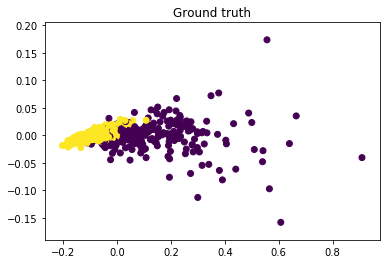

In [68]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

plt.title('Ground truth')
plt.scatter(X2D[:, 0], X2D[:, 1], c=Y)

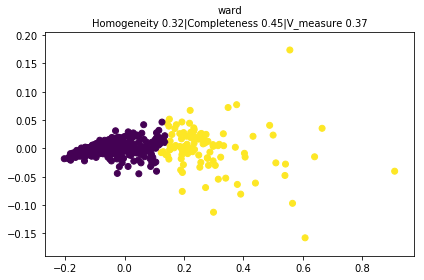

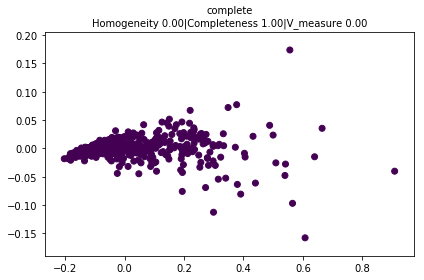

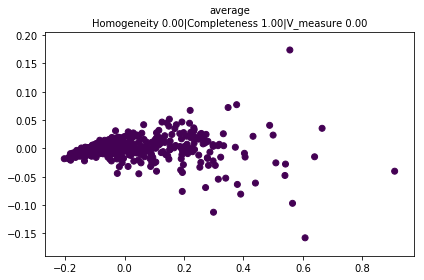

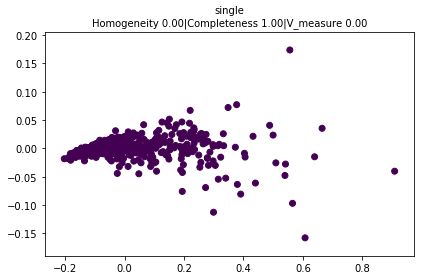

In [81]:
for linkage in ['ward', 'complete', 'average', 'single']:
    clusterize(X2D, Y, linkage, n_clusters=None, compute_full_tree=True, dist_threshold=2)

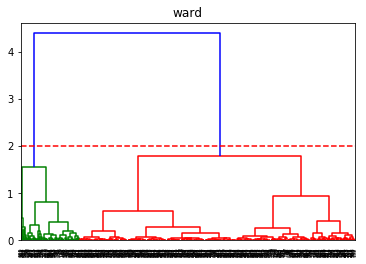

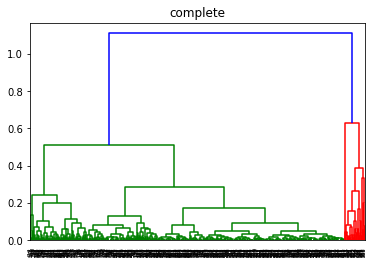

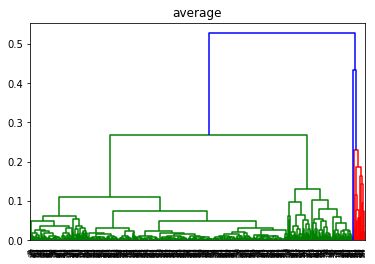

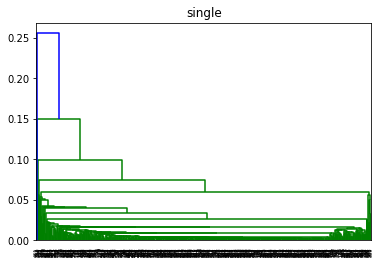

In [82]:
for linkage in ['ward', 'complete', 'average', 'single']:
    plt.title(linkage) 
    shc.dendrogram((shc.linkage(X2D, method=linkage))) 
    plt.axhline(y=2, color='r', linestyle='--')
    plt.show()

### Adding connectivity constraints

These constraints are useful to impose a certain local structure, they also make the algorithm faster, especially when the number of the samples is high. The connectivity constraints are imposed via a connectivity matrix: a sparse matrix that has elements only at the intersection of a row and a column with indices of the dataset that should be connected.

D:\Users\Abner\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:244: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


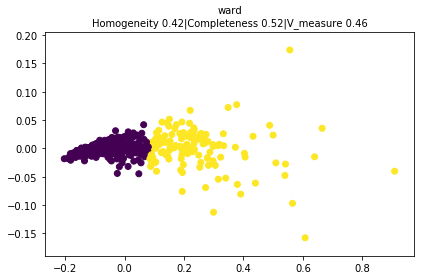

D:\Users\Abner\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


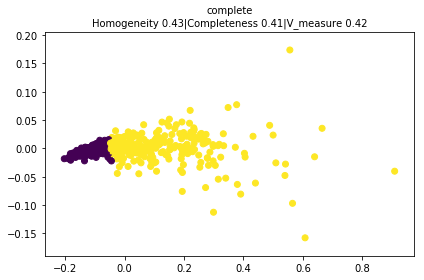

D:\Users\Abner\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


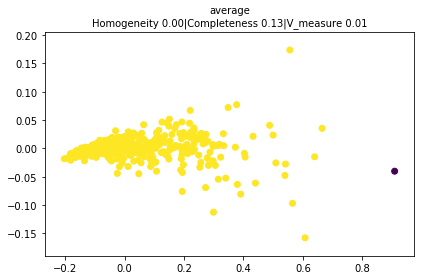

D:\Users\Abner\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:473: UserWarning: the number of connected components of the connectivity matrix is 24 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


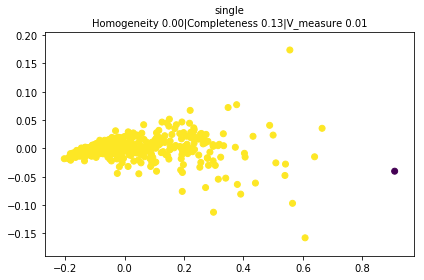

In [86]:
knn_graph = kneighbors_graph(X2D, 2)  # connectivity graph with the 2 nearest neighbors
connectivity = knn_graph.toarray()
for linkage in ['ward', 'complete', 'average', 'single']:
    clusterize(X2D, Y, linkage, connectivity=connectivity)